# Exemplo de como utilizar MoveDataFrame em um arquivo
vamos utilizar o arquivo pacific.csv como um exemplo de uso do PyMove. No arquivo, mostra os dados de furações e tufões que ocorreram no Pacifico, disponivel no site da Kagle https://www.kaggle.com/noaa/hurricane-database?select=pacific.csv

Vamos começar importando o Pandas o PyMove e algumas das principais funções que precisaremos utilizar:

In [1]:
import pandas as pd
import pymove as pm
from pymove import folium, MoveDataFrame
from pymove.query import query

Para utilizarmos a parte que contem os gráficos, vamos precisar importar o seguinte:

In [2]:
from pymove.visualization import folium as f, matplotlib as mpl
from pymove.utils import visual

E vamos importa as funções de leitura, para podermos pegar o arquivo:

In [3]:
from pymove import read_csv

Agora podemos ler o arquivo pacific.csv e dar uma olhado em seus dados:

In [4]:
pacific_pandas_df = pd.read_csv('pacific.csv')
pacific_pandas_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


Mas o arquivo ainda não está no formato correto para podermos utilizar, por isso vamos começar a filtrar alguns valores que vamos precisar:

In [5]:
filtry_pacific = pacific_pandas_df[['ID', 'Name', 'Latitude', 'Longitude', 'Date', 'Time']]
filtry_pacific.head()

,ID,Name,Latitude,Longitude,Date,Time
0,EP011949,UNNAMED,20.2N,106.3W,19490611,0
1,EP011949,UNNAMED,20.2N,106.4W,19490611,600
2,EP011949,UNNAMED,20.2N,106.7W,19490611,1200
3,EP011949,UNNAMED,20.3N,107.7W,19490611,1800
4,EP011949,UNNAMED,20.4N,108.6W,19490612,0


Agora precisamos criar uma coluna chamada Datetime, convertendo os valores de Date e Time para Datetime:

In [6]:
pacific_pandas_df = pm.conversions.lat_and_lon_decimal_degrees_to_decimal(
    pacific_pandas_df, latitude='Latitude', longitude='Longitude'
)

In [7]:
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
pacific_pandas_df['Datetime'] = pacific_pandas_df.apply(convert_to_datetime, axis=1)

filtry_pacific = pacific_pandas_df[['ID', 'Name', 'Latitude', 'Longitude', 'Datetime']]
filtry_pacific.head()

,ID,Name,Latitude,Longitude,Datetime
0,EP011949,UNNAMED,20.2,-106.3,1949-06-11 00:00:00
1,EP011949,UNNAMED,20.2,-106.4,1949-06-11 06:00:00
2,EP011949,UNNAMED,20.2,-106.7,1949-06-11 12:00:00
3,EP011949,UNNAMED,20.3,-107.7,1949-06-11 18:00:00
4,EP011949,UNNAMED,20.4,-108.6,1949-06-12 00:00:00


Agora que temos todas as colunas que precisamos, podemos transformar nossa tabela para um MoveDataFrame:

In [8]:
pacific_df = MoveDataFrame(
    data=filtry_pacific, latitude='Latitude', longitude='Longitude',datetime='Datetime', traj_id='Name'
)
pacific_df.head()

,ID,id,lat,lon,datetime
0,EP011949,UNNAMED,20.2,-106.3,1949-06-11 00:00:00
1,EP011949,UNNAMED,20.2,-106.4,1949-06-11 06:00:00
2,EP011949,UNNAMED,20.2,-106.7,1949-06-11 12:00:00
3,EP011949,UNNAMED,20.3,-107.7,1949-06-11 18:00:00
4,EP011949,UNNAMED,20.4,-108.6,1949-06-12 00:00:00


Agora que já temos o arquivo em seu formato MoveDataFrame, podemos pegar outras funções para utilizar. Vamos ver o tipo, algumas informações da tragetória e o número de usuarios:

In [9]:
pacific_df.get_type()

'pandas'

In [10]:
pacific_df.show_trajectories_info()


====================== INFORMATION ABOUT DATASET ======================

Number of Points: 26137

Number of IDs objects: 267

Start Date:1949-06-11 00:00:00     End Date:2015-11-29 12:00:00

Bounding Box:(4.2, -180.0, 54.0, 179.9)





In [11]:
pacific_df.get_users_number()

1

Agora, para não precisarmos sempre fazer esses mesmos passos toda vez que quisermos utilizar esses dados, podemos criar um arquivo chamado pacific_df.csv, com o formato correto de um MoveDataFrame. Também podemos criar um arquivo pacific.txt com todos os dados.

In [12]:
pacific_df.write_file('pacific.txt')

In [13]:
pacific_df.to_csv('pacific_df.csv')

Agora, se quisermos, é só pegar diretamente do arquivo, que ele já vai estár pronto para ser utilizado:

In [14]:
move_df = pm.read_csv('pacific_df.csv')

move_df.head()

,Unnamed: 0,ID,id,lat,lon,datetime
0,0,EP011949,UNNAMED,20.2,-106.3,1949-06-11 00:00:00
1,1,EP011949,UNNAMED,20.2,-106.4,1949-06-11 06:00:00
2,2,EP011949,UNNAMED,20.2,-106.7,1949-06-11 12:00:00
3,3,EP011949,UNNAMED,20.3,-107.7,1949-06-11 18:00:00
4,4,EP011949,UNNAMED,20.4,-108.6,1949-06-12 00:00:00


Agora podemos utilizar funções para mostrar esses dados em formato gráfico:

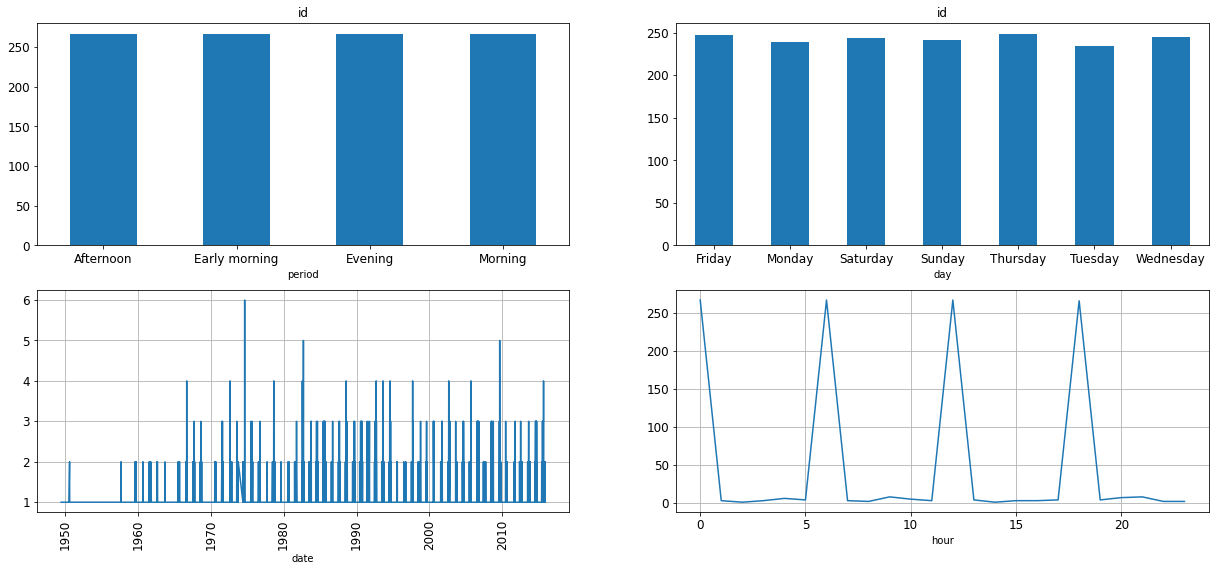

In [15]:
mpl.show_object_id_by_date(move_df, return_fig=False)

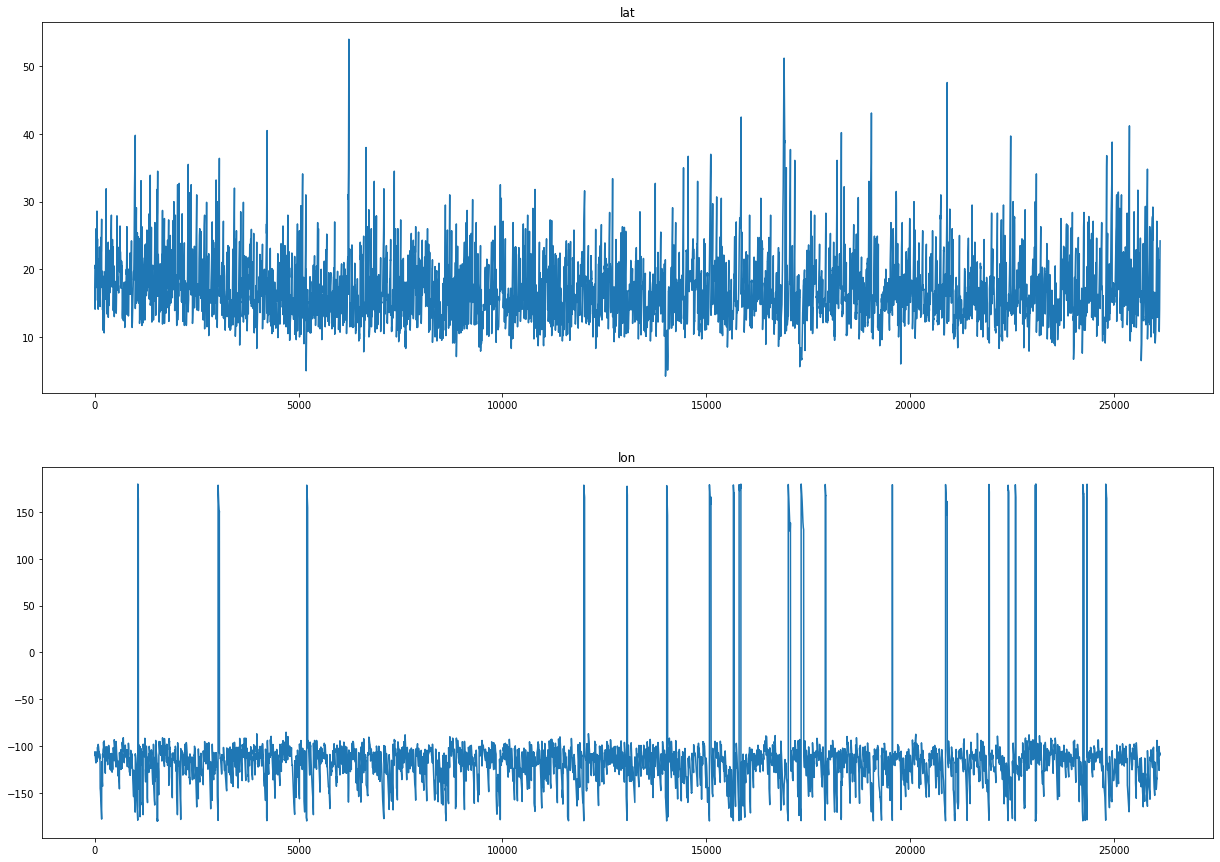

In [16]:
mpl.plot_all_features(move_df, return_fig=False)

Vamos ver no mapa a tragetoria que os tufões e furações fizeram entre os dias 11/06/1949 até o dia 25/06/1949:

In [17]:
f.plot_trajectory_by_date(move_df, '1949-06-11', '1949-06-25')

Se quisermos, podemos aumentar a distancia entre os dias, para assim receber mais dados, vamos pegar 3 anos de diferencia:

In [18]:
f.plot_trajectory_by_date(move_df, '1949-06-11', '1952-06-25')

Vamos dar uma olhada no cluster que os dados do arquivo nos dá:

In [19]:
f.cluster(move_df, 1000)

E podemos dar uma olhada no calor formado pelos tufões e furações nessas áreas:

In [20]:
f.heatmap(move_df)

Não são apenas essas funções, possuimos muito mais para ajudar a mostrar e identificar os diferentes dados contidos em um arquivo.